In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline

In [2]:
df = pd.read_csv('./Resources/filmtv_movies - ENG.csv')
df

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,0,0,0,0,0


In [3]:
print(df.shape)

(40303, 17)


In [4]:
drama_df = df.loc[df['genre'] == 'Drama']
drama_df

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
6,22,A ciascuno il suo,1967,Drama,93,Italy,Elio Petri,"Gian Maria Volonté, Irene Papas, Gabriele Ferz...",7.6,7.71,7.0,136,0,2,3,3,1
9,26,At Close Range,1986,Drama,115,United States,James Foley,"Christopher Walken, Sean Penn, Chris Penn, Mar...",7.5,7.64,7.0,86,0,2,1,2,1
11,32,Sleeping with the Enemy,1990,Drama,96,United States,Joseph Ruben,"Julia Roberts, Patrick Bergin, Kevin Anderson,...",5.0,4.33,6.0,109,1,3,2,3,1
18,49,Fail-Safe,1964,Drama,110,United States,Sidney Lumet,"Henry Fonda, Dan O'Herlihy, Walter Matthau, Do...",8.3,8.29,8.0,71,0,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40276,219448,Le mur des morts,2022,Drama,48,France,Eugène Green,"Saia Hiriart, Édouard Sulpice, Francoise Lebru...",10.0,10.00,NaN,1,0,0,0,0,0
40279,219453,La memoria del mondo,2022,Drama,99,Italy,Mirko Locatelli,"Fabrizio Falco, Maurizio Solda, Fabrizio Calfa...",7.0,7.00,NaN,1,0,0,0,0,0
40285,220206,Dionysus in '69,1970,Drama,85,United States,"Brian De Palma, Richard Schechner","Remi Barclay, Samuel Blazer, Jason Bosseau, Ri...",5.0,NaN,5.0,1,0,0,0,0,0
40294,220786,Filumena Marturano,2022,Drama,112,Italy,Francesco Amato,"Vanessa Scalera, Massimiliano Gallo, Nunzia Sc...",5.5,6.00,5.0,11,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40303 entries, 0 to 40302
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     40303 non-null  int64  
 1   title         40303 non-null  object 
 2   year          40303 non-null  int64  
 3   genre         40208 non-null  object 
 4   duration      40303 non-null  int64  
 5   country       40292 non-null  object 
 6   directors     40270 non-null  object 
 7   actors        38251 non-null  object 
 8   avg_vote      40303 non-null  float64
 9   critics_vote  35703 non-null  float64
 10  public_vote   39829 non-null  float64
 11  total_votes   40303 non-null  int64  
 12  humor         40303 non-null  int64  
 13  rhythm        40303 non-null  int64  
 14  effort        40303 non-null  int64  
 15  tension       40303 non-null  int64  
 16  erotism       40303 non-null  int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 5.2+ MB


In [6]:
df.drop_duplicates()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,0,0,0,0,0


In [7]:
df = df.dropna()

In [8]:
df

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
5,21,The Uranian Conspiracy,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40277,219449,Aftersun,2022,Thriller,70,Spain,Lluís Galter,"Lola Daniel, Alex Moreu, Carmela Poch, Ainoa S...",6.0,7.00,5.0,2,0,0,0,0,0
40278,219450,Daseos beonjjae hyungchu,2022,Horror,62,South Korea,Syeyoung Park,"Jihyeon Park, Hyein Moon, Seokyoung Haam",7.0,7.00,7.0,2,0,0,0,0,0
40284,220175,Natale a tutti i costi,2022,Comedy,90,Italy,Giovanni Bognetti,"Christian De Sica, Angela Finocchiaro, Dharma ...",4.9,4.67,5.0,27,0,0,0,0,0
40286,220208,I migliori giorni,2023,Comedy,125,Italy,"Massimiliano Bruno, Edoardo Leo","Edoardo Leo, Massimiliano Bruno, Anna Fogliett...",5.5,6.00,5.0,4,1,2,1,1,0


In [9]:
df = pd.read_csv('./Resources/filmtv_movies - ENG.csv').copy()

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Encode the genre column
le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])

# Choose your features (predictors) and target variables
X = df[['genre']]
y = df['avg_vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Evaluate the model's performance
r2 = reg.score(X_test, y_test)
print("R2:", r2)


R2: 0.0004714900064652916


In [18]:
# The above linear regression model shows there doesn't appear to be a correlation between genre and the avergae vote of the film

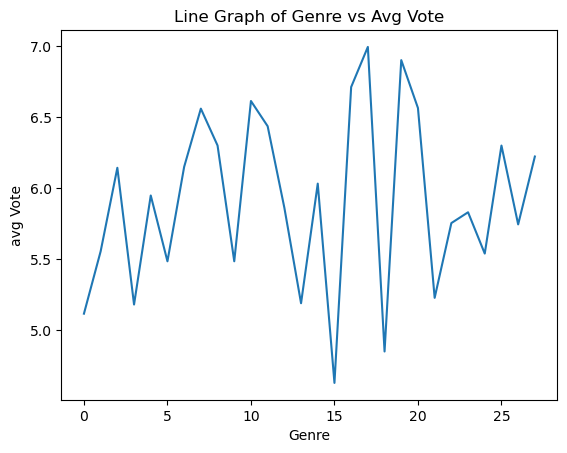

In [12]:
import matplotlib.pyplot as plt
import pandas as pd



# Group the data by genre and calculate the mean avg_vote for each group
grouped = df.groupby('genre').mean()

# Plot the mean avg_vote for each genre
grouped['avg_vote'].plot(kind='line', x='genre', y='avg_vote')

# Add labels to the plot
plt.xlabel('Genre')
plt.ylabel('avg Vote')
plt.title('Line Graph of Genre vs Avg Vote')

# Show the plot
plt.show()

In [13]:
##############################################################################################################

In [14]:
X = df[['tension']]
y = df['avg_vote']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
print(r2)

0.08956471809513777


In [ ]:
# As we compare one of the other features, such as tension, we see the r-square increase 

In [15]:
#############################################################################################################

In [17]:
# Encode the genre column
le = LabelEncoder()
drama_df['genre'] = le.fit_transform(drama_df['genre'])

# Choose your features (predictors) and target variables
X = drama_df[['genre']]
y = drama_df['avg_vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

# Evaluate the model's performance
r2 = reg.score(X_test, y_test)
print("R2:", r2)

R2: -0.00015969273497695724


C:\Users\dillo\AppData\Local\Temp\ipykernel_3492\861645318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_df['genre'] = le.fit_transform(drama_df['genre'])


In [22]:
X = df[['effort', 'humor', 'rhythm', 'tension', 'erotism']]
y = df['avg_vote']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
print(r2)

0.18094597595446404


In [ ]:
## ALmost 20% correlation between effort, humor, rhythm, erotism, and tension. Indicating that movies are complex and something like genre alone will not offer a higher average vote score. We see a higher correlation between other features such as the ones tested here. Things like tension, effort, humor, seem to persuade vote count more regardless of genre. 